4.9 PART 2

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing data
path = r'C:\Users\25670\Desktop\Intercart Basket Analysis16.07.2024'

In [3]:
path

'C:\\Users\\25670\\Desktop\\Intercart Basket Analysis16.07.2024'

In [4]:
# importing dataframe
df_sub = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [5]:
import warnings
warnings.simplefilter(action ='ignore', category=FutureWarning)

QN. 3

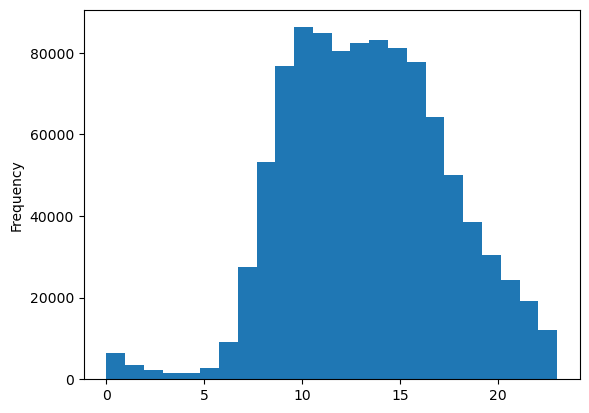

In [6]:
#creating histogram for 'order_hour_of_day'
hist = df_sub['order_hour_of_day'].plot.hist(bins = 24)

The busiest hours of the day are 8am-4pm

QN. 4

In [7]:
# Creating new column "max_order"

df_sub['max_order'] = df_sub.groupby(['user_id'])['order_number'].transform(np.max)

In [8]:
# Assign loyalty flag
df_sub.loc[df_sub['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

df_sub.loc[(df_sub['max_order'] <= 40) & (df_sub['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

df_sub.loc[df_sub['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [9]:
# Check Loyalty flag in data frame
df_sub[['user_id', 'loyalty_flag', 'order_number','max_order']].head(20)

,user_id,loyalty_flag,order_number,max_order
0,138,Regular customer,28,30
1,138,Regular customer,30,30
2,709,New customer,2,5
3,764,New customer,1,3
4,764,New customer,3,3
5,777,Regular customer,16,16
6,825,New customer,3,3
7,910,Regular customer,12,12
8,1052,Regular customer,10,18
9,1052,Regular customer,15,18


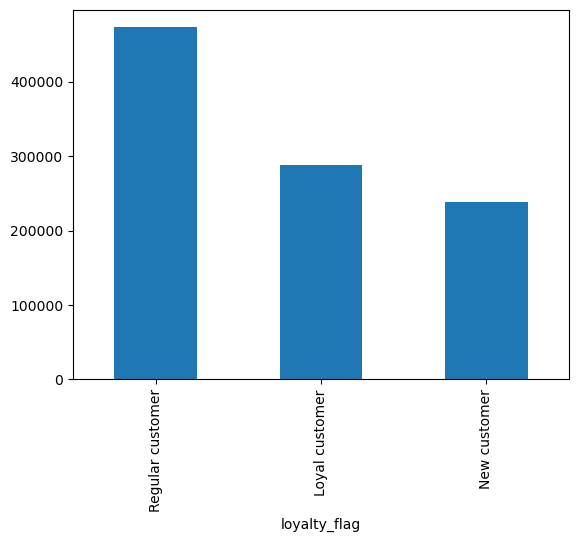

In [10]:
#creating a bar chart for "loyalty_flag"

bar = df_sub['loyalty_flag'].value_counts().plot.bar()

QN. 5 Checking the difference in spending by hour of day

In [11]:
#creating a sample of the dataframe
sampled_df_sub = df_sub.sample(n=100000, random_state=1)

In [12]:
#group by hour of the day and calculate the mean expenditure
hourly_expenditure = sampled_df_sub.groupby('order_hour_of_day')['prices'].mean().reset_index()

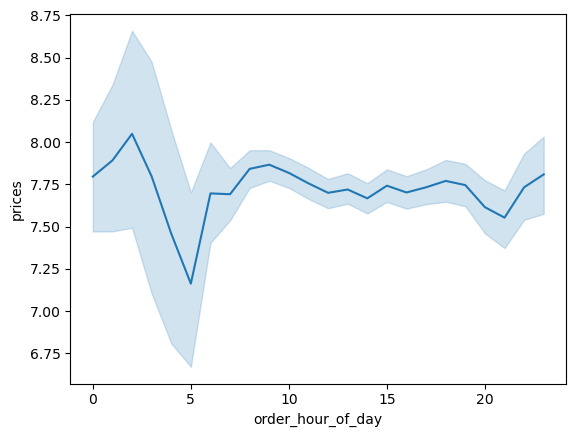

In [13]:
#creating a line chart
line_price_hod = sns.lineplot(data = sampled_df_sub, x = 'order_hour_of_day', y = 'prices')

QN. 6 Connections between age and number of depentants

In [14]:
sampled_df_sub.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'busiest_days', 'busiest_day', 'busiest_period_of_day', 'First Name',
       'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependents', 'Family Status', 'Income', 'max_order',
       'loyalty_flag'],
      dtype='object')

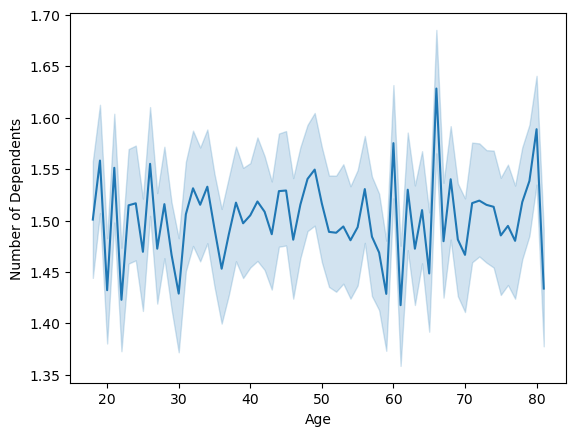

In [15]:
#creating a line chart
line_age_nod = sns.lineplot(data = sampled_df_sub, x = 'Age', y = 'Number of Dependents')

There is no clear correlation between 'Age' and 'Number of Dependents'

QN. 7

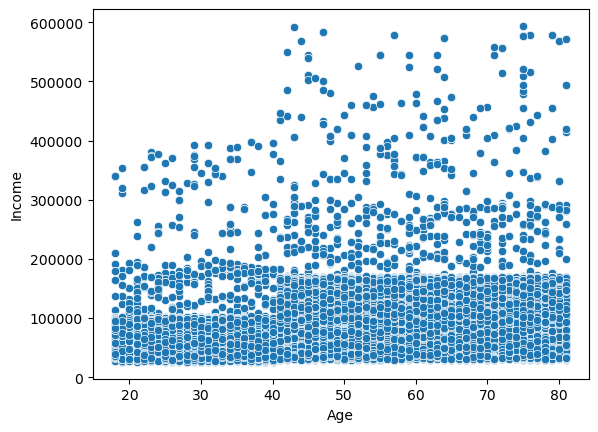

In [16]:
#creating a scatterplot of 'Age' and 'Income'
scatter = sns.scatterplot(x='Age', y='Income', data=sampled_df_sub)

There is a steep step at age 40, with an increase in income.

QN. 8

In [17]:
#exporting and saving images
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_order_hour_of_day.png'))

In [18]:
#exporting and saving image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_loyalty_flag.png'))

In [19]:
#exporting and saving image
line_price_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'line_price_hour_of_day.png'))

In [20]:
#exporting and saving image
line_age_nod.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'line_age_number_of_dependents.png'))